<a href="https://colab.research.google.com/github/sudhamsalagar123/SENSOTRAIN_INTERN/blob/main/Titanic_Survival_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

1. Load the Dataset
*    Used Pandas to load Titanic-Dataset.csv
*  Shape: (891 rows, 12 columns)
Dataset includes passenger details: demographics, travel class, fare, family relations, survival status, etc.





In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2) Missing Values — What’s Missing & Why I Handle It This Way

I count missing values and decide:

(a) fill Age with median (robust to outliers),

 (b) drop 2 Embarked NAs,

 (c) ignore Cabin (too sparse/unstructured).

In [15]:
# Missing counts
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


2. Understanding Dataset Structure
*  info() showed missing values in:
*   Age (177 missing)
*  Cabin (687 missing)
*   Embarked (2 missing)
5 object-type columns → Sex, Embarked converted to categorical for efficiency.

In [17]:
# 2a) Age -> median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1570267720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [18]:
# 2b) Embarked -> drop rows (only a couple missing)
df.dropna(subset=["Embarked"], inplace=True)

In [19]:
# 2c) Cabin -> drop column (too many missing + messy)
df.drop(columns=["Cabin"], inplace=True, errors="ignore")

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


3. Data Cleaning

Handled missing values:

Age → filled with median

Embarked → dropped 2 missing rows

Cabin → too many missing values → ignored in analysis

No duplicates found

Converted categorical columns for efficiency

In [21]:
df['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [22]:
df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [23]:
# Convert categorical
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 71.4+ KB


4. Exploratory Data Visualization

4.1 Univariate Analysis


We will explore each feature one by one and summarize our observations.

1. Target Variable – Survival

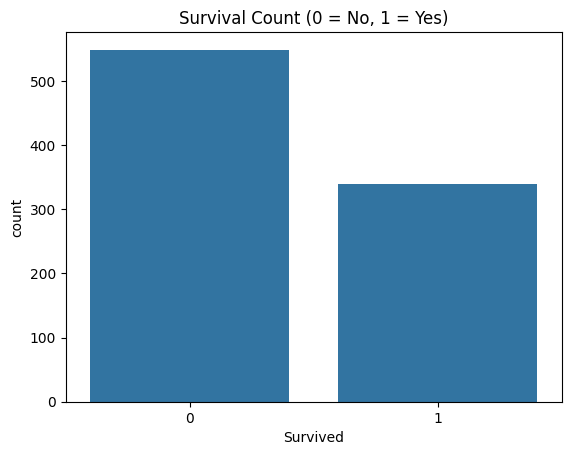

,proportion
Survived,
0,61.754781
1,38.245219


In [29]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

df['Survived'].value_counts(normalize=True)*100

Observation: Majority did not survive (~62%), only ~38% survived.

2. **Sex**

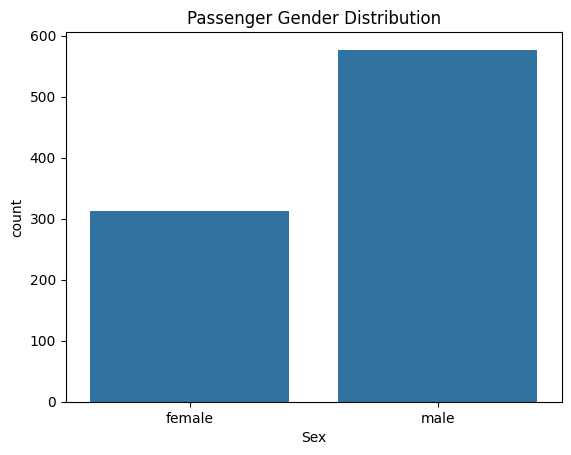

,proportion
Sex,
male,64.904387
female,35.095613


In [31]:
sns.countplot(x="Sex", data=df)
plt.title("Passenger Gender Distribution")
plt.show()
df['Sex'].value_counts(normalize=True)*100

Observation:
>**More males (~65%) than females** (~35%).


3. Pclass (Passenger Class)

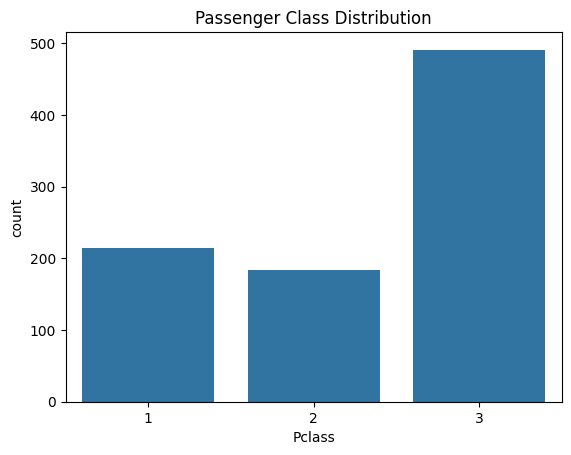

,proportion
Pclass,
3,55.230596
1,24.071991
2,20.697413


In [33]:
sns.countplot(x="Pclass", data=df)
plt.title("Passenger Class Distribution")
plt.show()
df['Pclass'].value_counts(normalize=True)*100

**Observation: Most passengers were in 3rd class (~55%), followed by 1st (~24%) and 2nd (~21%)**.



4. Embarked (Port of Boarding)

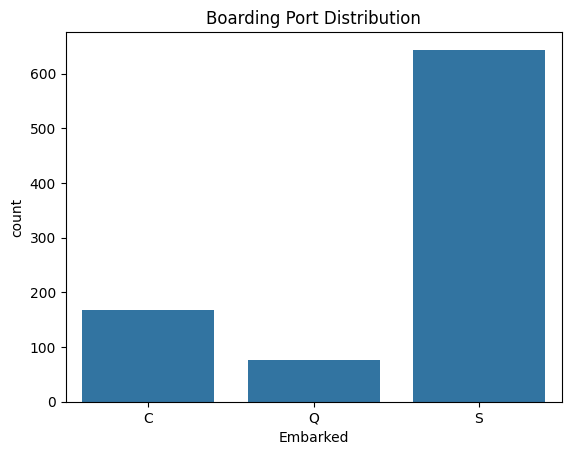

,proportion
Embarked,
S,72.440945
C,18.897638
Q,8.661417


In [35]:
sns.countplot(x="Embarked", data=df)
plt.title("Boarding Port Distribution")
plt.show()

df['Embarked'].value_counts(normalize=True)*100


5. Family Members on Board (SibSp + Parch)

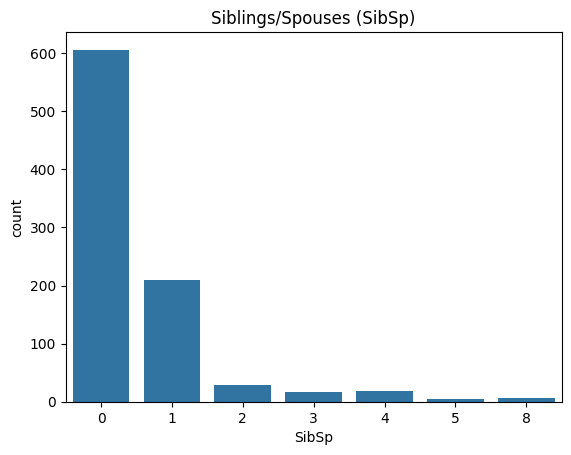

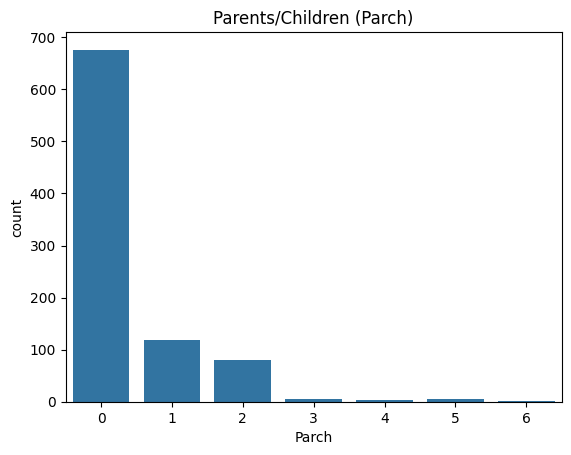

In [36]:
sns.countplot(x="SibSp", data=df)
plt.title("Siblings/Spouses (SibSp)")
plt.show()

sns.countplot(x="Parch", data=df)
plt.title("Parents/Children (Parch)")
plt.show()

6. Fare

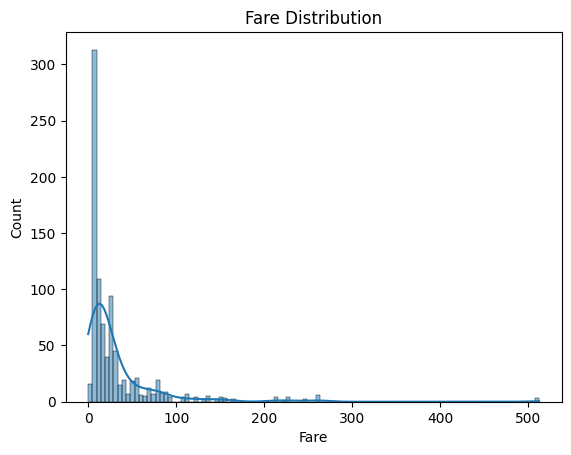

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


In [37]:
sns.histplot(df["Fare"], kde=True)
plt.title("Fare Distribution")
plt.show()

df["Fare"].describe()

7. Age

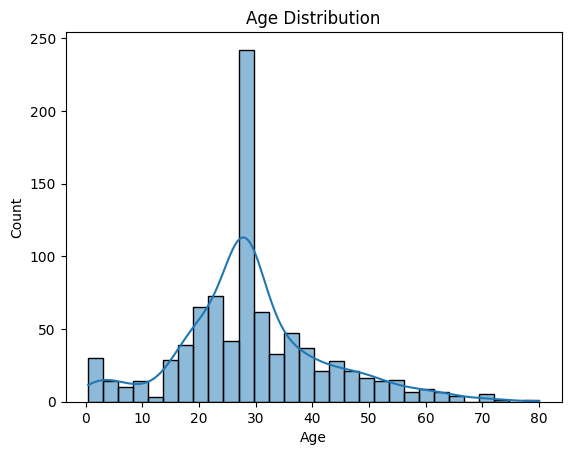

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [38]:
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

df["Age"].describe()

✅ Summary of Univariate Analysis:

Majority did not survive (~62%).

More males than females.

Most were 3rd class passengers.

Majority boarded at Southampton (S).

Most passengers traveled alone.

Fare distribution is highly skewed (many cheap, few expensive).

Passengers were mostly young; very few elderly.

**Step 5. Bivariate Analysis**

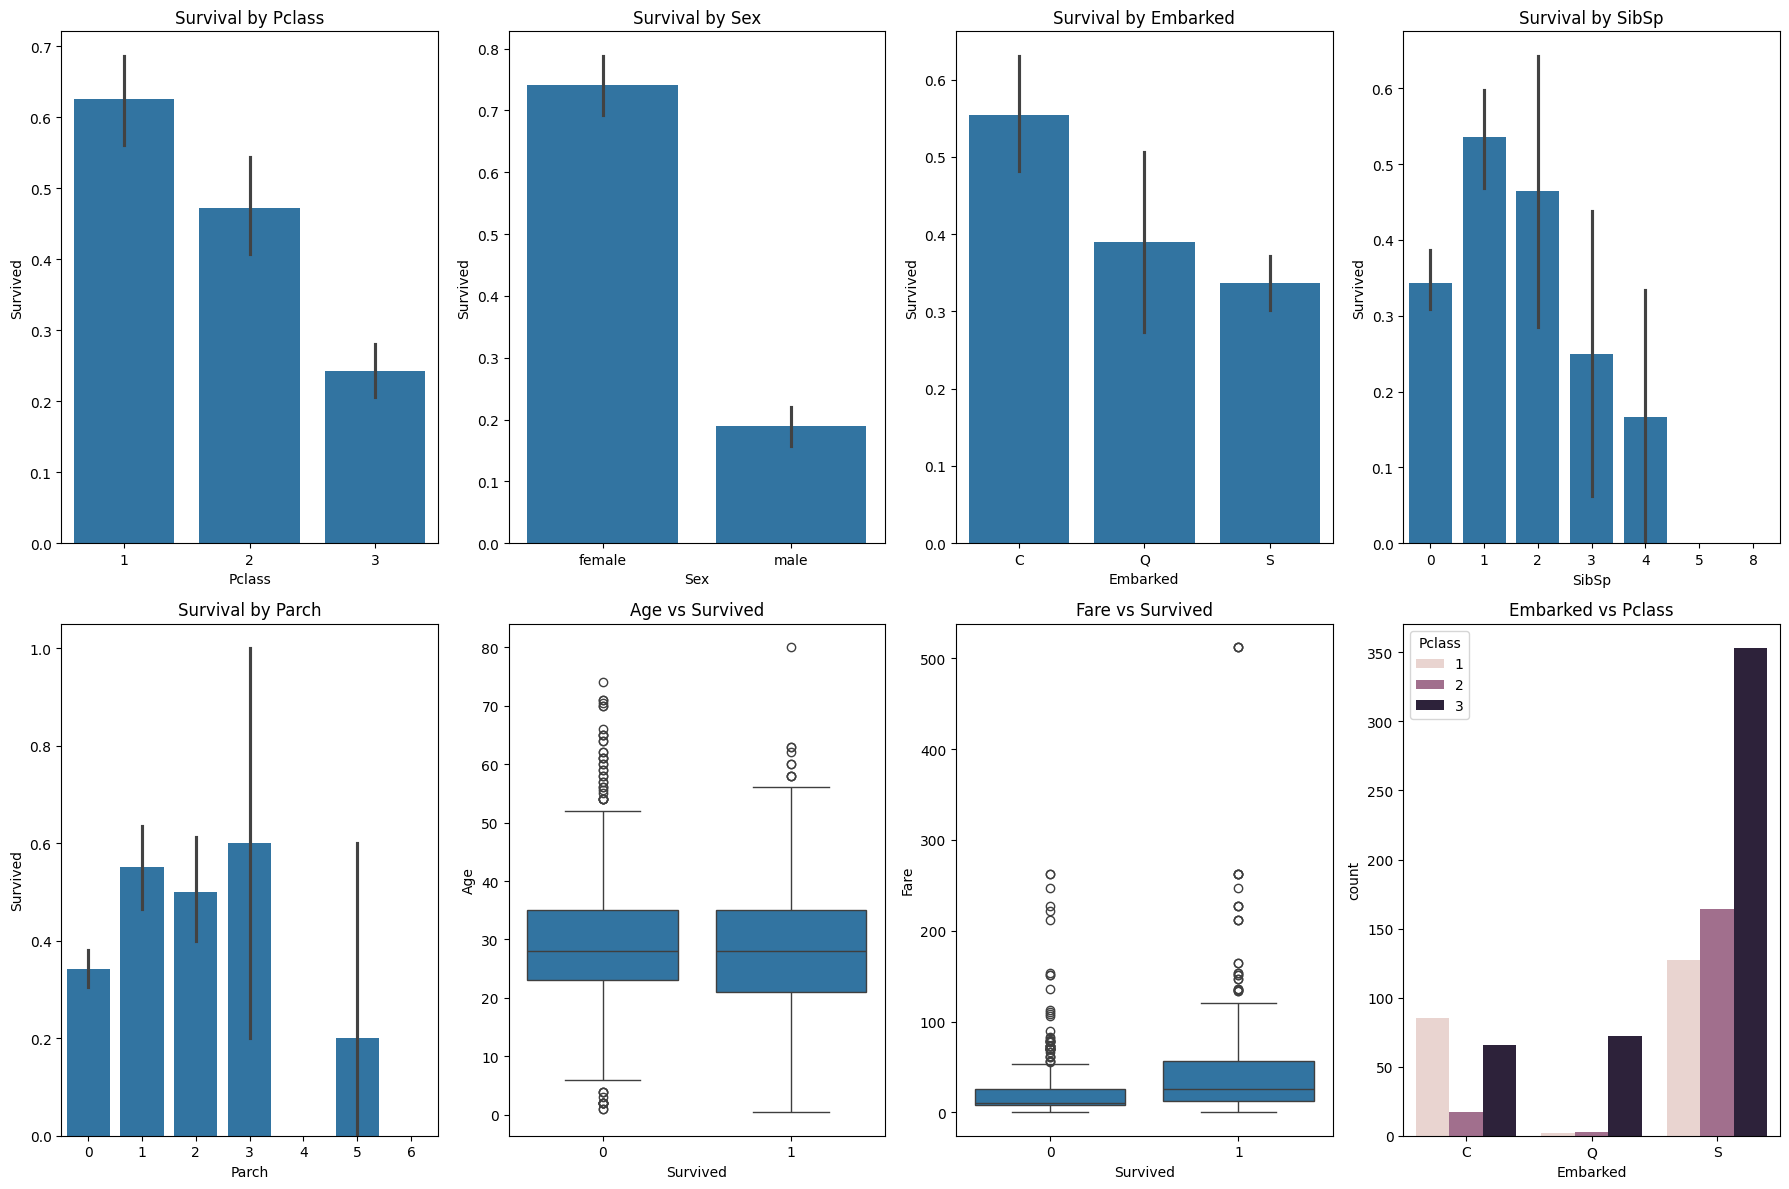

In [39]:
fig, axes = plt.subplots(2,4, figsize=(18,12))

sns.barplot(x="Pclass", y="Survived", data=df, ax=axes[0,0]).set_title("Survival by Pclass")
sns.barplot(x="Sex", y="Survived", data=df, ax=axes[0,1]).set_title("Survival by Sex")
sns.barplot(x="Embarked", y="Survived", data=df, ax=axes[0,2]).set_title("Survival by Embarked")
sns.barplot(x="SibSp", y="Survived", data=df, ax=axes[0,3]).set_title("Survival by SibSp")
sns.barplot(x="Parch", y="Survived", data=df, ax=axes[1,0]).set_title("Survival by Parch")
sns.boxplot(x="Survived", y="Age", data=df, ax=axes[1,1]).set_title("Age vs Survived")
sns.boxplot(x="Survived", y="Fare", data=df, ax=axes[1,2]).set_title("Fare vs Survived")
sns.countplot(x="Embarked", hue="Pclass", data=df, ax=axes[1,3]).set_title("Embarked vs Pclass")

plt.tight_layout()
plt.show()


**Step 6. Multivariate Analysis**

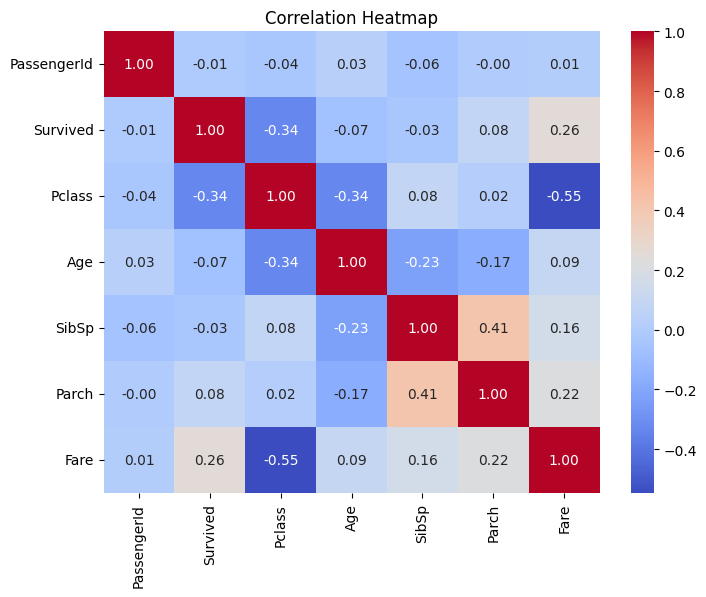

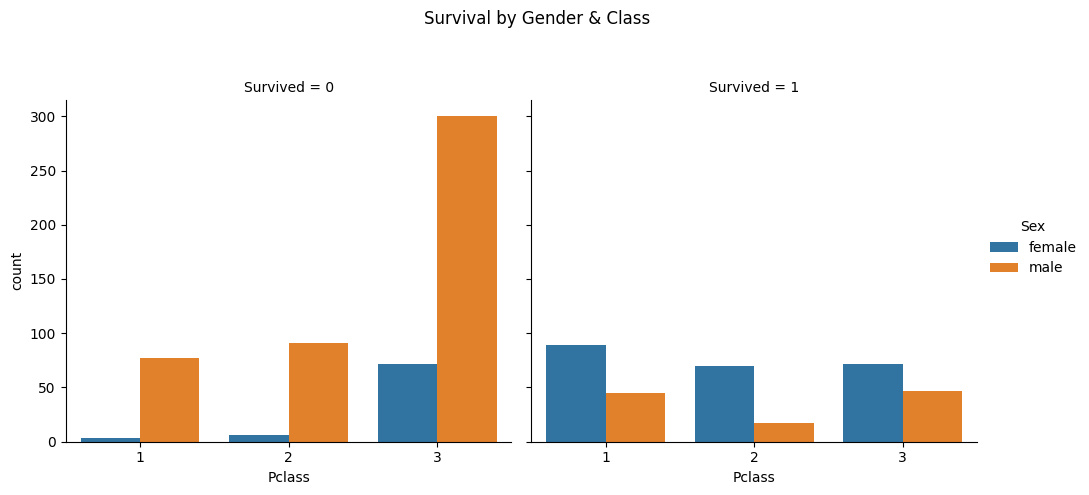

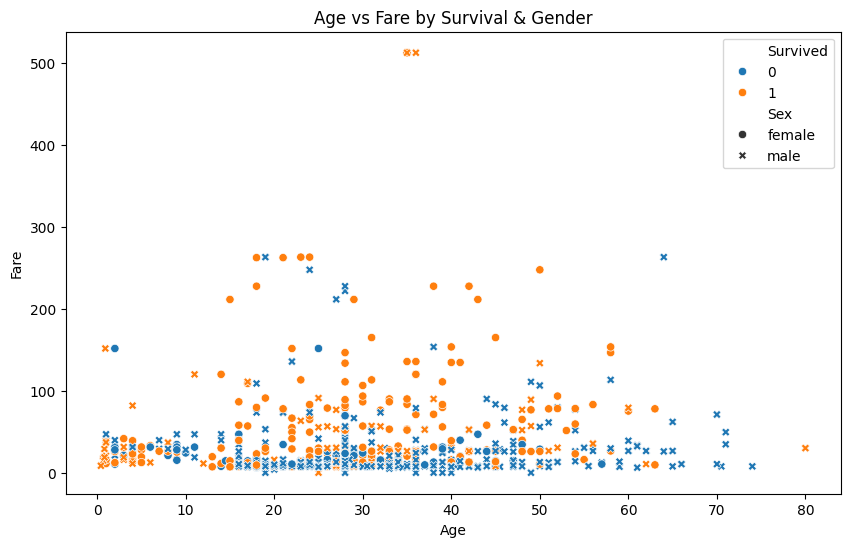

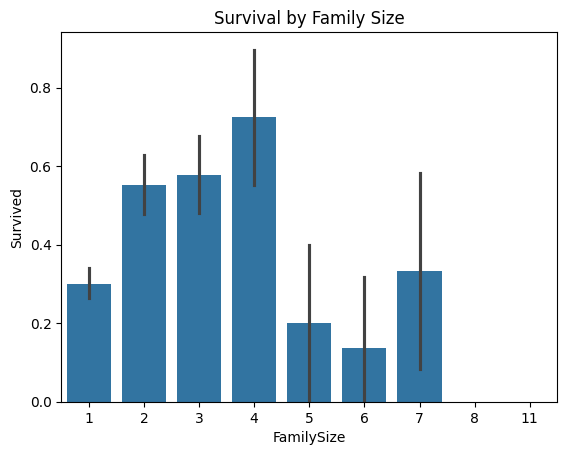

In [40]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Survival by Gender & Class
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count", height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Gender & Class")
plt.show()

# Scatter Age vs Fare
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", style="Sex", data=df)
plt.title("Age vs Fare by Survival & Gender")
plt.show()

# Family size feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival by Family Size")
plt.show()


In [41]:
print("🔹 Insights from Titanic EDA:\n")
print("- Majority (~62%) of passengers did not survive.")
print("- Females had much higher survival (~74%) than males (~19%).")
print("- 1st class passengers survived the most; 3rd class the least.")
print("- Higher fares = higher survival; fare strongly tied to class.")
print("- Children (younger age) had better survival chances.")
print("- Passengers traveling with small families (2–4 members) had better chances than alone or very large families.")
print("- Most boarded at Southampton (S), but those from Cherbourg (C) had better survival.")

🔹 Insights from Titanic EDA:

- Majority (~62%) of passengers did not survive.
- Females had much higher survival (~74%) than males (~19%).
- 1st class passengers survived the most; 3rd class the least.
- Higher fares = higher survival; fare strongly tied to class.
- Children (younger age) had better survival chances.
- Passengers traveling with small families (2–4 members) had better chances than alone or very large families.
- Most boarded at Southampton (S), but those from Cherbourg (C) had better survival.
